# MENTAL HEALTH PREDICTION MODEL USING MACHINE LEARNING

## We will have multiple stages for creating this project and the steps will be as follows:

### 1. Preprocessing of Data
### 2. Model Training
### 3. Creating Frontend to implement the model
### 4. Result Analysis


### The Dataset we are going to use is MOCK_DATA.csv which we have build ourselves...

In [34]:
# firstly import libraries like pandas and numpy for data preprocessing using import command
import pandas as pd
import numpy as np

In [35]:
# read the csv file using read_csv function
df = pd.read_csv("MOCK_DATA.csv")

# As you can see below is our dataset consisting of 1000 rows and 20 columns

# Now we have seen our dataset carefully let's start with our first task i.e. data    preprocessing

In [36]:
value_counts_A = df['FIELD OF STUDY'].value_counts()
value_counts_B = df['SOCIAL ENGAGEMENT'].value_counts()
value_counts_C = df['Steps to Reduce Usage'].value_counts()

print(value_counts_B)

SOCIAL ENGAGEMENT
Yes             500
occasionally    253
frequently      247
Name: count, dtype: int64


In [37]:
for index, value in df['SOCIAL ENGAGEMENT'].items():
    if value == 'Yes':
        df.at[index, 'SOCIAL ENGAGEMENT'] = 'rarely'


In [38]:
increase_count = 70

# Identify indices where 'rarely' is present
rarely_indices = df[df['SOCIAL ENGAGEMENT'] == 'rarely'].index

# Randomly select indices from 'rarely' and update them to 'frequently' and 'occasionally'
selected_indices = np.random.choice(rarely_indices, size=increase_count * 2, replace=False)

# Update the 'new_social_engagement' column
df.loc[selected_indices[:increase_count], 'SOCIAL ENGAGEMENT'] = 'frequently'
df.loc[selected_indices[increase_count:], 'SOCIAL ENGAGEMENT'] = 'occasionally'

# Update the counts in the new column
new_counts = df['SOCIAL ENGAGEMENT'].value_counts()

In [39]:
value_counts_A = df['FIELD OF STUDY'].value_counts()
value_counts_B = df['SOCIAL ENGAGEMENT'].value_counts()
value_counts_C = df['Steps to Reduce Usage'].value_counts()

print(value_counts_B)

SOCIAL ENGAGEMENT
rarely          360
occasionally    323
frequently      317
Name: count, dtype: int64


In [40]:
for index, row in df.iterrows():
    if row['OCCUPATION'] == 'Teacher' and row['AGE'] <= 20:
        df.at[index, 'OCCUPATION'] = 'Student'

for index, row in df.iterrows():
    if row['OCCUPATION'] == 'Student' and row['AGE'] >= 30:
        df.at[index, 'OCCUPATION'] = 'Teacher'

In [41]:
print(value_counts_A)

FIELD OF STUDY
Marketing                  108
Biology                    104
Computer Science           104
Psychology                 102
Business Administration    102
Civil Engineering          102
Electrical Engineering     101
Finance                     96
Graphic Design              92
Mechanical Engineering      89
Name: count, dtype: int64


In [42]:
# defining a new column of how much usage they normally should have
df['expected_usage'] = ''

for index, row in df.iterrows():
    field_of_study = row['FIELD OF STUDY']
    
    if field_of_study in ['Marketing', 'Finance','Computer Science',]:
        df.at[index, 'expected_usage'] = 'High'
    elif field_of_study in [ 'Electrical Engineering', 'Business Administration','Mechanical Engineering']:
        df.at[index, 'expected_usage'] = 'Medium'
    else:
        df.at[index, 'expected_usage'] = 'Low'

In [43]:
value_counts_F = df['sleep duration'].value_counts()
print(value_counts_F)

sleep duration
13    82
15    80
4     79
10    76
9     74
12    73
5     68
8     67
7     66
3     63
2     58
14    56
1     55
11    54
6     49
Name: count, dtype: int64


In [44]:
bins = [1, 5, 10, float('inf')]
labels = ['Below 5 hours', '5-9 hours', 'Above 9 hours']

# Create a new column 'Time Slot' based on sleep duration categories
df['Time Slot'] = pd.cut(df['sleep duration'], bins=bins, labels=labels, right=False)

In [45]:
df = df.drop(columns = ['sleep duration'])

In [46]:
# renaming the column name
df.rename(columns={'Time Slot': 'sleep time'}, inplace=True)

In [47]:
# # data preprocessing
# for index,row in df.iterrows():
#     if row['Phone Reduction Attempt'] == 'No':
#         df.at[index,'Reduction Success'] = None

In [48]:
# count no of different values in a particular column
df['Plan to Reduce Phone Usage'].value_counts()

Plan to Reduce Phone Usage
Yes    500
No     500
Name: count, dtype: int64

In [49]:
# ALL THE ATTRIBUTES IN OUR DATASET
print(df.columns)
df

Index(['NAME', 'AGE', 'GENDER', 'OCCUPATION', 'FIELD OF STUDY',
       'MEDICAL HISTORY', 'PHONE SCREEN TIME', 'FREQUENCY', 'SOCIAL HANDLES',
       'Anxiety/Stress Away From Phone', 'Feeling Without Phone',
       'SOCIAL ENGAGEMENT', 'Phone Reduction Attempt', 'Reduction Success',
       'Focus Ability', 'Phone Impact on Lifestyle', 'WELL BEING',
       'Plan to Reduce Phone Usage', 'Steps to Reduce Usage', 'expected_usage',
       'sleep time'],
      dtype='object')


,NAME,AGE,GENDER,OCCUPATION,FIELD OF STUDY,MEDICAL HISTORY,PHONE SCREEN TIME,FREQUENCY,SOCIAL HANDLES,Anxiety/Stress Away From Phone,...,SOCIAL ENGAGEMENT,Phone Reduction Attempt,Reduction Success,Focus Ability,Phone Impact on Lifestyle,WELL BEING,Plan to Reduce Phone Usage,Steps to Reduce Usage,expected_usage,sleep time
0,Junette Griffin,22,Female,Student,Marketing,Yes,2-3 hours,Every hour,Twitter,yes,...,occasionally,Yes,Very successful,Neutral,Fair,Bad,Yes,Practice mindful phone usage,High,5-9 hours
1,Donn Ricoald,32,Male,Teacher,Electrical Engineering,No,1-2 hours,Every 15 minutes,Facebook,yes,...,occasionally,No,Somewhat successful,Neutral,Good,Bad,Yes,Set phone usage limits,Medium,5-9 hours
2,Brandon Gush,33,Male,Teacher,Finance,Yes,More than 5 hours,Every few minutes,Twitter,No,...,frequently,No,Very successful,Somewhat difficult to focus,Neutral,Good,No,Disable push notifications,High,Above 9 hours
3,Roger Littlekit,19,Male,Student,Marketing,Yes,2-3 hours,Every few minutes,Instagram,yes,...,frequently,No,Not at all successful,Somewhat difficult to focus,Good,Good,Yes,Create a phone-free zone,High,Below 5 hours
4,Clarke Sterricks,27,Male,Teacher,Psychology,Yes,1-2 hours,Every few minutes,Facebook,No,...,occasionally,Yes,Very successful,Very easy to focus,Good,Good,No,Practice digital detox days,Low,Above 9 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Eberhard Widmoor,20,Male,Student,Finance,No,3-4 hours,Every 15 minutes,Twitter,yes,...,rarely,Yes,Somewhat successful,Somewhat difficult to focus,Neutral,Good,No,Create a phone-free zone,High,5-9 hours
996,Beverley Mainds,20,Female,Student,Psychology,No,2-3 hours,Every 15 minutes,Twitter,yes,...,rarely,No,Not at all successful,Neutral,Neutral,Neutral,Yes,Create a phone-free zone,Low,Above 9 hours
997,Jere Shaplin,30,Female,Teacher,Graphic Design,No,1-2 hours,Every 15 minutes,Instagram,No,...,frequently,Yes,Somewhat successful,Somewhat difficult to focus,Good,Good,No,Use a phone tracking app,Low,Above 9 hours
998,Hughie Rowet,36,Male,Teacher,Mechanical Engineering,Yes,3-4 hours,Every 15 minutes,Facebook,No,...,frequently,Yes,Somewhat successful,Somewhat difficult to focus,Neutral,Bad,No,Set specific times for checking social media,Medium,Above 9 hours


# Now we have successfully completed the data preprocessing part of the project and our dataset is fully prepared for model building

# The only thing we need to do right now is feature selection to select the main attributes we are going to use in our model which are as follows:


### 1. NAME 
### 2. AGE
### 3. OCCUPATION
### 4. MEDICAL HISTORY
### 5. FIELD OF STUDY
### 6. PHONE SCREEN TIME
### 7. FREQUENCY
### 8. ANXIETY/STRESS AWAY FROM PHONE
### 9. SLEEP RANGE
### 10. EXPECTED USAGE
### 11. FOCUS ABILITY
### 12. WELL BEING

In [50]:
# data preprocessing
for index,row in df.iterrows():
    if row['Anxiety/Stress Away From Phone'] == 'No':
        df.at[index,'Anxiety/Stress Away From Phone'] = 0
        
    else:
        df.at[index,'Anxiety/Stress Away From Phone'] = 1
        
for index,row in df.iterrows():
    if row['Phone Reduction Attempt'] == 'No':
        df.at[index,'Phone Reduction Attempt'] = 0
        
    else:
        df.at[index,'Phone Reduction Attempt'] = 1

In [51]:
df.to_csv('final.csv',index=False)

In [53]:
sas_df = pd.read_csv('final.csv')
sas_df
# print(sas_df.columns)

,NAME,AGE,GENDER,OCCUPATION,FIELD OF STUDY,MEDICAL HISTORY,PHONE SCREEN TIME,FREQUENCY,SOCIAL HANDLES,Anxiety/Stress Away From Phone,...,SOCIAL ENGAGEMENT,Phone Reduction Attempt,Reduction Success,Focus Ability,Phone Impact on Lifestyle,WELL BEING,Plan to Reduce Phone Usage,Steps to Reduce Usage,expected_usage,sleep time
0,Junette Griffin,22,Female,Student,Marketing,Yes,2-3 hours,Every hour,Twitter,1,...,occasionally,1,Very successful,Neutral,Fair,Bad,Yes,Practice mindful phone usage,High,5-9 hours
1,Donn Ricoald,32,Male,Teacher,Electrical Engineering,No,1-2 hours,Every 15 minutes,Facebook,1,...,occasionally,0,Somewhat successful,Neutral,Good,Bad,Yes,Set phone usage limits,Medium,5-9 hours
2,Brandon Gush,33,Male,Teacher,Finance,Yes,More than 5 hours,Every few minutes,Twitter,0,...,frequently,0,Very successful,Somewhat difficult to focus,Neutral,Good,No,Disable push notifications,High,Above 9 hours
3,Roger Littlekit,19,Male,Student,Marketing,Yes,2-3 hours,Every few minutes,Instagram,1,...,frequently,0,Not at all successful,Somewhat difficult to focus,Good,Good,Yes,Create a phone-free zone,High,Below 5 hours
4,Clarke Sterricks,27,Male,Teacher,Psychology,Yes,1-2 hours,Every few minutes,Facebook,0,...,occasionally,1,Very successful,Very easy to focus,Good,Good,No,Practice digital detox days,Low,Above 9 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Eberhard Widmoor,20,Male,Student,Finance,No,3-4 hours,Every 15 minutes,Twitter,1,...,rarely,1,Somewhat successful,Somewhat difficult to focus,Neutral,Good,No,Create a phone-free zone,High,5-9 hours
996,Beverley Mainds,20,Female,Student,Psychology,No,2-3 hours,Every 15 minutes,Twitter,1,...,rarely,0,Not at all successful,Neutral,Neutral,Neutral,Yes,Create a phone-free zone,Low,Above 9 hours
997,Jere Shaplin,30,Female,Teacher,Graphic Design,No,1-2 hours,Every 15 minutes,Instagram,0,...,frequently,1,Somewhat successful,Somewhat difficult to focus,Good,Good,No,Use a phone tracking app,Low,Above 9 hours
998,Hughie Rowet,36,Male,Teacher,Mechanical Engineering,Yes,3-4 hours,Every 15 minutes,Facebook,0,...,frequently,1,Somewhat successful,Somewhat difficult to focus,Neutral,Bad,No,Set specific times for checking social media,Medium,Above 9 hours


# PHQ-9 CLASSIFICATION

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = np.array([
    [1.000, 0.670, 0.420, 0.630, 0.350, 0.550, 0.590, 0.550, 0.380],
    [0.670, 1.000, 0.460, 0.520, 0.340, 0.720, 0.580, 0.540, 0.520],
    [0.420, 0.460, 1.000, 0.580, 0.410, 0.400, 0.410, 0.370, 0.260],
    [0.630, 0.520, 0.580, 1.000, 0.420, 0.470, 0.570, 0.510, 0.310],
    [0.350, 0.340, 0.410, 0.420, 1.000, 0.390, 0.370, 0.240, 0.270],
    [0.550, 0.720, 0.400, 0.470, 0.390, 1.000, 0.610, 0.550, 0.500],
    [0.590, 0.580, 0.410, 0.570, 0.370, 0.610, 1.000, 0.610, 0.410],
    [0.550, 0.540, 0.370, 0.510, 0.240, 0.550, 0.610, 1.000, 0.410],
    [0.380, 0.520, 0.260, 0.310, 0.270, 0.500, 0.410, 0.410, 1.000]
])

np.random.seed(42)
synthetic_data = np.random.multivariate_normal(mean=[1]*9, cov=correlation_matrix, size=1000)
synthetic_data = np.clip(np.round(synthetic_data), 0, 3)

sum_values = np.sum(synthetic_data, axis=1)
synthetic_df = pd.DataFrame(synthetic_data, columns=['phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9'], dtype=int)
synthetic_df['sum'] = sum_values

synthetic_df.to_csv('phq.csv',index=False)

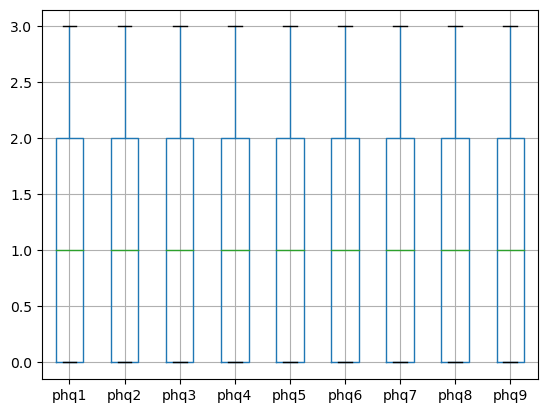

In [3]:
data = pd.read_csv('phq.csv')
data.boxplot(column=['phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9'])
plt.show()

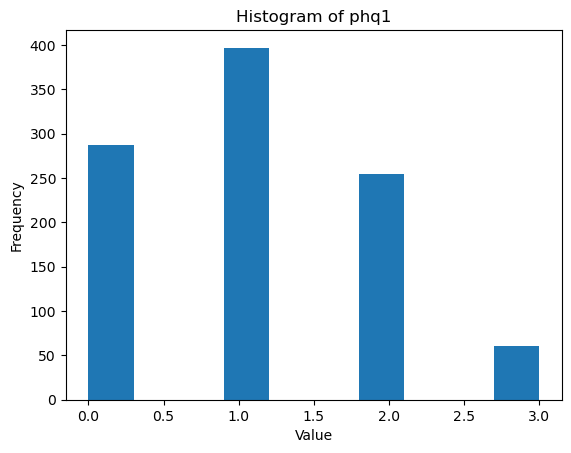

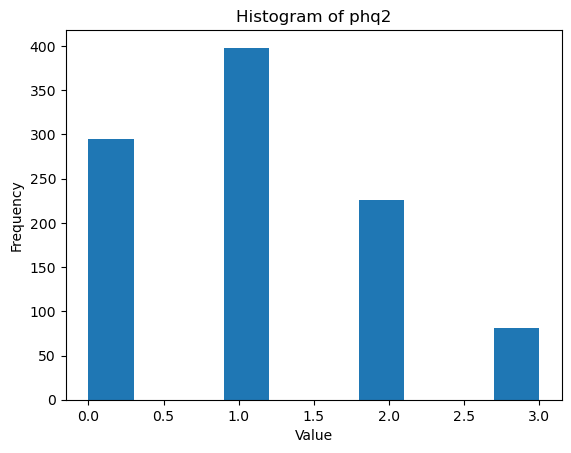

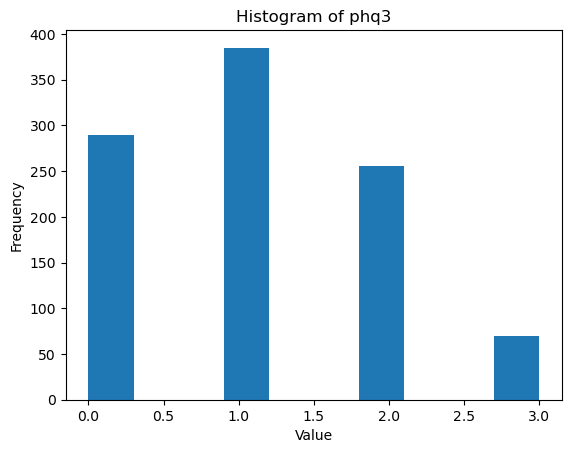

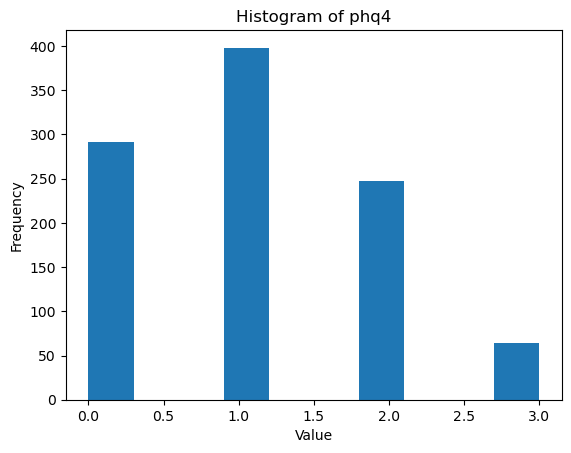

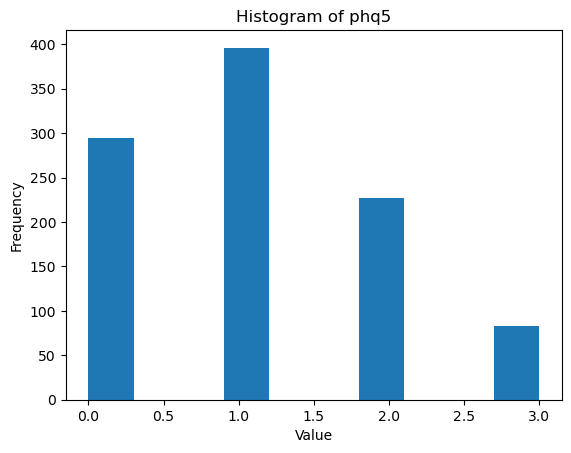

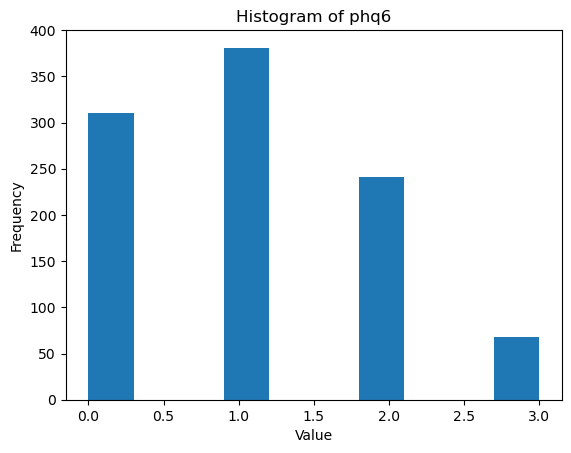

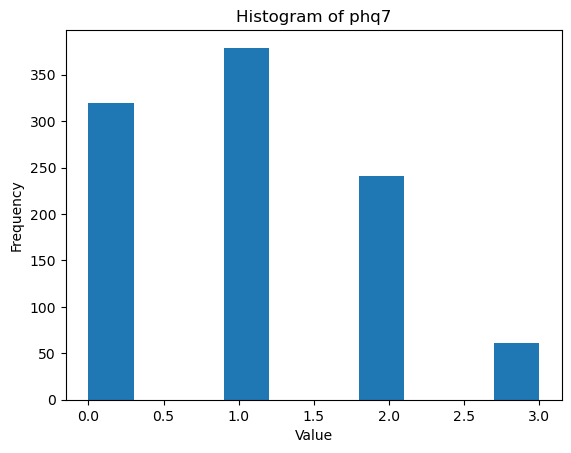

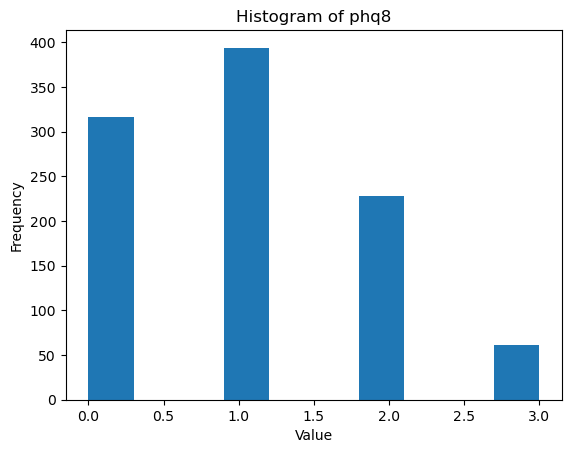

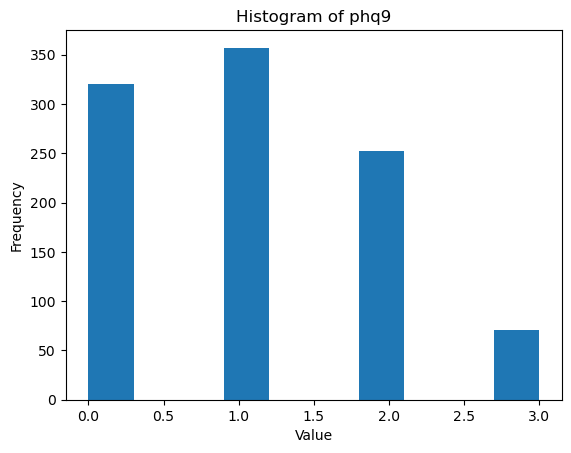

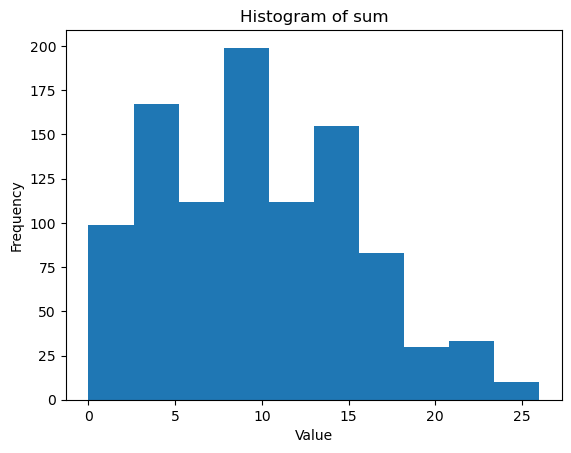

Mean Values:
phq1    1.090
phq2    1.093
phq3    1.107
phq4    1.084
phq5    1.099
phq6    1.067
phq7    1.044
phq8    1.033
phq9    1.074
sum     9.691
dtype: float64

Median Values:
phq1    1.0
phq2    1.0
phq3    1.0
phq4    1.0
phq5    1.0
phq6    1.0
phq7    1.0
phq8    1.0
phq9    1.0
sum     9.0
dtype: float64

Minimum Values:
phq1    0.0
phq2    0.0
phq3    0.0
phq4    0.0
phq5    0.0
phq6    0.0
phq7    0.0
phq8    0.0
phq9    0.0
sum     0.0
dtype: float64

Maximum Values:
phq1     3.0
phq2     3.0
phq3     3.0
phq4     3.0
phq5     3.0
phq6     3.0
phq7     3.0
phq8     3.0
phq9     3.0
sum     26.0
dtype: float64

Quantiles:
      phq1  phq2  phq3  phq4  phq5  phq6  phq7  phq8  phq9   sum
0.25   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0
0.50   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   9.0
0.75   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0  13.0

Correlation Matrix:
          phq1      phq2      phq3      phq4      phq5      phq6      phq7

In [4]:
mean_values = data.mean()
median_values = data.median()
std_deviation = data.std()
min_values = data.min()
max_values = data.max()
quantiles = data.quantile([0.25, 0.5, 0.75])

for column in data.columns:
    plt.hist(data[column], bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

correlation_matrix = data.corr()
skewness = data.skew()
kurtosis = data.kurt()
variance = np.var(data,axis = 0, ddof = 1)
print("Mean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nMinimum Values:")
print(min_values)
print("\nMaximum Values:")
print(max_values)
print("\nQuantiles:")
print(quantiles)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)
print("\nStandard Deviation:")
print(std_deviation)
print("\nVariance:")
print(variance)

In [5]:
def cronbach_alpha(dataset):
    items_count = dataset.shape[1]
    variances_sum = np.var(dataset, axis=0, ddof=1).sum()
    total_var = np.var(np.sum(dataset, axis=1), ddof=1)
    alpha = (items_count / (items_count - 1)) * (1 - (variances_sum / total_var))
    return alpha

questions_data = data[['phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9']]
data_array = questions_data.to_numpy()
print("Cronbach's Alpha:", cronbach_alpha(data_array))

Cronbach's Alpha: 0.8627604169404445


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# Replace missing values with zeros
data.fillna(0, inplace=True)
def categorize_sum(score):
    if 1 <= score <= 4:
        return 'Minimal depression'
    elif 5 <= score <= 9:
        return 'Mild depression'
    elif 10 <= score <= 14:
        return 'Moderate depression'
    elif 15 <= score <= 19:
        return 'Moderately severe depression'
    elif 20 <= score <= 26:
        return 'Severe depression'
    else:
        return 'No depression'

data['Depression_Severity'] = data['sum'].apply(categorize_sum)
X = data.drop(['sum', 'Depression_Severity'], axis=1)
y = data['Depression_Severity'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

predictions_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_svm)
classification_rep_svm = classification_report(y_test, predictions_svm)
sample_row = [[2, 3, 2, 1, 4, 3, 2, 3, 1]]
prediction = svm_classifier.predict(sample_row)

print("Predicted Depression Level:", prediction)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(classification_rep_svm)

Predicted Depression Level: ['Severe depression']
SVM Accuracy: 0.9966666666666667
SVM Classification Report:
                              precision    recall  f1-score   support

             Mild depression       1.00      1.00      1.00       102
          Minimal depression       1.00      1.00      1.00        48
         Moderate depression       1.00      1.00      1.00        87
Moderately severe depression       1.00      0.97      0.99        39
               No depression       1.00      1.00      1.00        10
           Severe depression       0.93      1.00      0.97        14

                    accuracy                           1.00       300
                   macro avg       0.99      1.00      0.99       300
                weighted avg       1.00      1.00      1.00       300



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [7]:
svm_classifier = SVC(kernel='poly', random_state=42)
svm_classifier.fit(X_train, y_train)
predictions_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, predictions_svm)
classification_rep_svm = classification_report(y_test, predictions_svm)
sample_prediction_svm = svm_classifier.predict(sample_row)
print(sample_row)
print("SVM Predicted Depression Level:", sample_prediction_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(classification_rep_svm)

[[2, 3, 2, 1, 4, 3, 2, 3, 1]]
SVM Predicted Depression Level: ['Severe depression']
SVM Accuracy: 0.94
SVM Classification Report:
                              precision    recall  f1-score   support

             Mild depression       1.00      0.93      0.96       102
          Minimal depression       0.74      1.00      0.85        48
         Moderate depression       1.00      1.00      1.00        87
Moderately severe depression       1.00      0.97      0.99        39
               No depression       0.00      0.00      0.00        10
           Severe depression       0.93      1.00      0.97        14

                    accuracy                           0.94       300
                   macro avg       0.78      0.82      0.79       300
                weighted avg       0.92      0.94      0.93       300



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

In [12]:
conf_matrix = confusion_matrix(y_test, predictions_svm)

sensitivity = []
specificity = []
for i in range(len(np.unique(y_test))):
    TP = conf_matrix[i, i]
    FN = np.sum(conf_matrix[i, :]) - TP
    FP = np.sum(conf_matrix[:, i]) - TP
    TN = np.sum(conf_matrix) - TP - FN - FP

    sensitivity.append(TP / (TP + FN))
    specificity.append(TN / (TN + FP))

for i, class_label in enumerate(np.unique(y_test)):
    print(f"Class: {class_label}")
    print(f"Sensitivity: {sensitivity[i]:.2f}")
    print(f"Specificity: {specificity[i]:.2f}")
    print()

Class: Mild depression
Sensitivity: 0.93
Specificity: 1.00

Class: Minimal depression
Sensitivity: 1.00
Specificity: 0.93

Class: Moderate depression
Sensitivity: 1.00
Specificity: 1.00

Class: Moderately severe depression
Sensitivity: 0.97
Specificity: 1.00

Class: No depression
Sensitivity: 0.00
Specificity: 1.00

Class: Severe depression
Sensitivity: 1.00
Specificity: 1.00



# GAD-7 CLASSIFICATION